In [1]:
from datetime import datetime, date, time

In [118]:
import pandas as pd
import numpy as np
import requests

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

from matplotlib import pyplot as plt
import seaborn as sns

%matplotlib inline

In [3]:
data_nombres_estados = requests.get("https://dev-api.datamexico.org/tesseract/cubes/gobmx_covid/aggregate.jsonrecords?\
drilldowns%5B%5D=State+Patient+Attended.State+Patient+Attended.State+Patient+Attended\
&measures%5B%5D=Cases&parents=false&sparse=true")

df_nombres_estados = pd.DataFrame(data_nombres_estados.json()["data"])
ls_nombres_estados = list(df_nombres_estados['State Patient Attended'].unique())

dict_df_estados = {k:[] for k in ls_nombres_estados}

In [38]:
ls_id_estados = list(range(1,33))

url_estados = 'https://dev-api.datamexico.org/tesseract/cubes/gobmx_covid/aggregate.jsonrecords?\
cuts%5B%5D=State+Patient+Attended.State+Patient+Attended.State+Patient+Attended'

BASE_assoc_factors = '&drilldowns%5B%5D=Symptoms+Date.Symptoms+Date.Symptoms+Date\
&drilldowns%5B%5D=Ingress+Date.Ingress+Date.Ingress+Date\
&drilldowns%5B%5D=Age+Group.Age+Group.Age+Range\
&drilldowns%5B%5D=Sex.Sex.Sex\
&drilldowns%5B%5D=Covid+Result.Covid+Result.Covid+Result\
&drilldowns%5B%5D=Contact+with+Another+Covid+Case.Contact+with+Another+Covid+Case.Contact+with+Another+Covid+Case\
&drilldowns%5B%5D=Chronic+Kidney+Failure+Diagnose.Chronic+Kidney+Failure+Diagnose.Chronic+Kidney+Failure+Diagnose\
&drilldowns%5B%5D=COPD+Diagnose.COPD+Diagnose.COPD+Diagnose\
&drilldowns%5B%5D=Cardiovascular+Diagnose.Cardiovascular+Diagnose.Cardiovascular+Diagnose\
&drilldowns%5B%5D=Inmunosupresion+Diagnose.Inmunosupresion+Diagnose.Inmunosupresion+Diagnose\
&drilldowns%5B%5D=Obesity+Diagnose.Obesity+Diagnose.Obesity+Diagnose\
&drilldowns%5B%5D=Smoking+Diagnose.Smoking+Diagnose.Smoking+Diagnose\
&drilldowns%5B%5D=Diabetes+Diagnose.Diabetes+Diagnose.Diabetes+Diagnose\
&drilldowns%5B%5D=Asthma+Diagnose.Asthma+Diagnose.Asthma+Diagnose\
&drilldowns%5B%5D=Pneumonia+Diagnose.Pneumonia+Diagnose.Pneumonia+Diagnose\
&drilldowns%5B%5D=Hypertension+Diagnose.Hypertension+Diagnose.Hypertension+Diagnose\
&drilldowns%5B%5D=Diagnosis+of+Another+Disease.Diagnosis+of+Another+Disease.Diagnosis+of+Another+Disease\
&drilldowns%5B%5D=Is+Dead.Is+Dead.Is+Dead\
&measures%5B%5D=Cases&parents=false&sparse=true'

id_estado = 0

for name_estado in ls_nombres_estados:
 
    data_estado_id = requests.get(f'{url_estados}' + '.' + str(ls_id_estados[id_estado]) + f'{BASE_assoc_factors}')
    df_estado_id = pd.DataFrame(data_estado_id.json()["data"])
    
    dict_df_estados[ls_nombres_estados[id_estado]] = df_estado_id
    
    dict_df_estados[ls_nombres_estados[id_estado]]['Nombre Estado'] = ls_nombres_estados[id_estado]
    
    print('Completo: '+f'{ls_nombres_estados[id_estado]}')
    id_estado += 1


Completo: Aguascalientes
Completo: Baja California
Completo: Baja California Sur
Completo: Campeche
Completo: Coahuila de Zaragoza
Completo: Colima
Completo: Chiapas
Completo: Chihuahua
Completo: Ciudad de México
Completo: Durango
Completo: Guanajuato
Completo: Guerrero
Completo: Hidalgo
Completo: Jalisco
Completo: Estado de México
Completo: Michoacán de Ocampo
Completo: Morelos
Completo: Nayarit
Completo: Nuevo León
Completo: Oaxaca
Completo: Puebla
Completo: Querétaro
Completo: Quintana Roo
Completo: San Luis Potosí
Completo: Sinaloa
Completo: Sonora
Completo: Tabasco
Completo: Tamaulipas
Completo: Tlaxcala
Completo: Veracruz de Ignacio de la Llave
Completo: Yucatán
Completo: Zacatecas


In [81]:
id_estado = 0

for name_estado in ls_nombres_estados:
    
    date_symptoms = pd.to_datetime(dict_df_estados[ls_nombres_estados[id_estado]]['Symptoms Date ID'].apply(str))
    date_ingress = pd.to_datetime(dict_df_estados[ls_nombres_estados[id_estado]]['Ingress Date ID'].apply(str))
    D_time = date_ingress - date_symptoms
    dict_df_estados[ls_nombres_estados[id_estado]].insert(2, "Datetime difference", D_time)
    
    print('Completo: '+f'{ls_nombres_estados[id_estado]}')
    id_estado += 1


Completo: Aguascalientes
Completo: Baja California
Completo: Baja California Sur
Completo: Campeche
Completo: Coahuila de Zaragoza
Completo: Colima
Completo: Chiapas
Completo: Chihuahua
Completo: Ciudad de México
Completo: Durango
Completo: Guanajuato
Completo: Guerrero
Completo: Hidalgo
Completo: Jalisco
Completo: Estado de México
Completo: Michoacán de Ocampo
Completo: Morelos
Completo: Nayarit
Completo: Nuevo León
Completo: Oaxaca
Completo: Puebla
Completo: Querétaro
Completo: Quintana Roo
Completo: San Luis Potosí
Completo: Sinaloa
Completo: Sonora
Completo: Tabasco
Completo: Tamaulipas
Completo: Tlaxcala
Completo: Veracruz de Ignacio de la Llave
Completo: Yucatán
Completo: Zacatecas


In [115]:
id_estado = 0

for name_estado in ls_nombres_estados:
    
    dict_df_estados[ls_nombres_estados[id_estado]].drop(list(dict_df_estados[ls_nombres_estados[id_estado]].filter(regex = 'ID')), axis = 1, inplace = True)
    # cambiar la ubicacion de la columna Datetime difference
    cols = list(dict_df_estados[ls_nombres_estados[id_estado]].columns.values)
    n = len(cols)
    dict_df_estados[ls_nombres_estados[id_estado]] = dict_df_estados[ls_nombres_estados[id_estado]][[cols[0]] + [cols[2]] + [cols[1]] + cols[3:n]]
        
    print('Completo: '+f'{ls_nombres_estados[id_estado]}')
    id_estado += 1

Completo: Aguascalientes
Completo: Baja California
Completo: Baja California Sur
Completo: Campeche
Completo: Coahuila de Zaragoza
Completo: Colima
Completo: Chiapas
Completo: Chihuahua
Completo: Ciudad de México
Completo: Durango
Completo: Guanajuato
Completo: Guerrero
Completo: Hidalgo
Completo: Jalisco
Completo: Estado de México
Completo: Michoacán de Ocampo
Completo: Morelos
Completo: Nayarit
Completo: Nuevo León
Completo: Oaxaca
Completo: Puebla
Completo: Querétaro
Completo: Quintana Roo
Completo: San Luis Potosí
Completo: Sinaloa
Completo: Sonora
Completo: Tabasco
Completo: Tamaulipas
Completo: Tlaxcala
Completo: Veracruz de Ignacio de la Llave
Completo: Yucatán
Completo: Zacatecas


In [180]:
for i in range(0,32):
    print(len(dict_df_estados[ls_nombres_estados[i]].columns))

16
20
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21


In [119]:
n = dict_df_estados['Ciudad de México'].shape[0] // 7
dict_df_estados['Ciudad de México'].sample(n).to_csv('Covid_fact_asoc_CDMX.csv',index = False)

In [120]:
dict_df_estados['Ciudad de México'].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 473832 entries, 0 to 473831
Data columns (total 21 columns):
 #   Column                           Non-Null Count   Dtype          
---  ------                           --------------   -----          
 0   Symptoms Date                    473832 non-null  object         
 1   Ingress Date                     473832 non-null  object         
 2   Datetime difference              473832 non-null  timedelta64[ns]
 3   Age Range                        473832 non-null  object         
 4   Sex                              473832 non-null  object         
 5   Covid Result                     473832 non-null  object         
 6   Contact with Another Covid Case  473832 non-null  object         
 7   Chronic Kidney Failure Diagnose  473832 non-null  object         
 8   COPD Diagnose                    473832 non-null  object         
 9   Cardiovascular Diagnose          473832 non-null  object         
 10  Inmunosupresion Diagnose        

In [155]:
df_list = [ v for k,v in dict_df_estados.items()] 
df_list.reverse()
df_list[0]
df = pd.concat(df_list ,axis=0)

In [194]:
df['Inmunosupresion Diagnose'].fillna('It is Ignored', inplace=True)
df['Asthma Diagnose'].fillna('It is Ignored', inplace=True)
df['Hypertension Diagnose'].fillna('It is Ignored', inplace=True)
df['Diagnosis of Another Disease'].fillna('It is Ignored', inplace=True)
df['Contact with Another Covid Case'].fillna('Not Specified', inplace=True)
df['Pneumonia Diagnose'].fillna('Not Specified', inplace=True)

In [331]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2324172 entries, 0 to 37552
Data columns (total 21 columns):
 #   Column                           Dtype          
---  ------                           -----          
 0   Symptoms Date                    object         
 1   Ingress Date                     object         
 2   Datetime difference              timedelta64[ns]
 3   Age Range                        category       
 4   Sex                              object         
 5   Covid Result                     object         
 6   Contact with Another Covid Case  object         
 7   Chronic Kidney Failure Diagnose  object         
 8   COPD Diagnose                    object         
 9   Cardiovascular Diagnose          object         
 10  Inmunosupresion Diagnose         object         
 11  Obesity Diagnose                 object         
 12  Smoking Diagnose                 object         
 13  Diabetes Diagnose                object         
 14  Asthma Diagnose     

In [198]:
df.groupby('Is Dead').sum()

,Cases
Is Dead,
No,39563338
Yes,2312907


In [222]:
df.groupby('Age Range').sum()

,Cases
Age Range,
0 to 4 years,580469
10 to 14 years,596917
15 to 19 years,1208208
20 to 24 years,3052520
25 to 29 years,4877729
30 to 34 years,5003406
35 to 39 years,4718473
40 to 44 years,4323820
45 to 49 years,4260548


In [229]:
# df.groupby('Age Range').sum().sort_values('Age Range')
ls_age_range_ord = list(np.sort(df['Age Range'].unique()))
ls_age_range_ord = [ls_age_range_ord[0]]+[ls_age_range_ord[9]]+ls_age_range_ord[1:9]+ls_age_range_ord[10:17]

df['Age Range'] = pd.Categorical(df['Age Range'], ls_age_range_ord)

In [204]:
train, test = train_test_split(df, test_size = 0.2)

In [206]:
geo = "?drilldowns%5B%5D=Is+Dead.Is+Dead.Is+Dead\
&drilldowns%5B%5D=Covid+Result.Covid+Result.Covid+Result\
&drilldowns%5B%5D=Country+Nationality.Country+Nationality.Country+Nationality\
&drilldowns%5B%5D=State+Patient+Attended.State+Patient+Attended.State+Patient+Attended\
&drilldowns%5B%5D=State+Patient+Origin.State+Patient+Origin.State+Patient+Origin\
&drilldowns%5B%5D=Municipality+Patient+Residence.Geography.State\
&measures%5B%5D=Cases&parents=false&sparse=false"

In [208]:
print('Training Size: {}; Test size: {}'.format(len(train), len(test)))

Training Size: 1859337; Test size: 464835


In [288]:
df_age_cases = df.groupby(['Is Dead','Age Range'],as_index=False).sum()
df_age_cases

,Is Dead,Age Range,Cases
0,No,0 to 4 years,568079
1,No,5 to 9 years,443770
2,No,10 to 14 years,593759
3,No,15 to 19 years,1203019
4,No,20 to 24 years,3040257
5,No,25 to 29 years,4852792
6,No,30 to 34 years,4962468
7,No,35 to 39 years,4654817
8,No,40 to 44 years,4221162
9,No,45 to 49 years,4096312


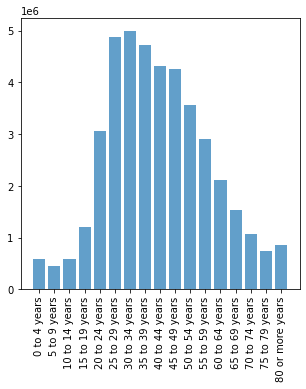

In [272]:
fig = plt.figure(figsize=(5,5))
age_ranges = df.groupby('Age Range',as_index=False).sum()

plt.bar(age_ranges['Age Range'],age_ranges['Cases'], alpha = 0.7)
plt.xticks(age_ranges['Age Range'],fontsize = 10, rotation = 'vertical')
plt.show()

In [341]:
age_ranges = df.groupby('Age Range',as_index=False).sum()
age_ranges['Age Range']

0         0 to 4 years
1         5 to 9 years
2       10 to 14 years
3       15 to 19 years
4       20 to 24 years
5       25 to 29 years
6       30 to 34 years
7       35 to 39 years
8       40 to 44 years
9       45 to 49 years
10      50 to 54 years
11      55 to 59 years
12      60 to 64 years
13      65 to 69 years
14      70 to 74 years
15      75 to 79 years
16    80 or more years
Name: Age Range, dtype: category
Categories (17, object): [0 to 4 years, 5 to 9 years, 10 to 14 years, 15 to 19 years, ..., 65 to 69 years, 70 to 74 years, 75 to 79 years, 80 or more years]

In [283]:
total_cases = df_age_cases['Cases'].sum()

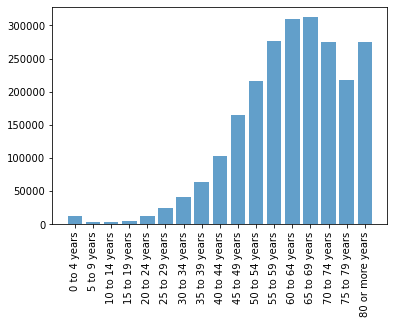

In [330]:
dead_age = df_age_cases.loc[df_age_cases['Is Dead'] == 'Yes']['Cases']
not_dead_age = df_age_cases[df_age_cases['Is Dead'] == 'No']['Cases']
age_ranges['Age Range']

plt.bar(age_ranges['Age Range'],dead_age, alpha = 0.7)
# plt.bar(age_ranges['Age Range'],not_dead_age, alpha = 0.7)
plt.xticks(age_ranges['Age Range'],fontsize = 10, rotation = 'vertical')

plt.show()


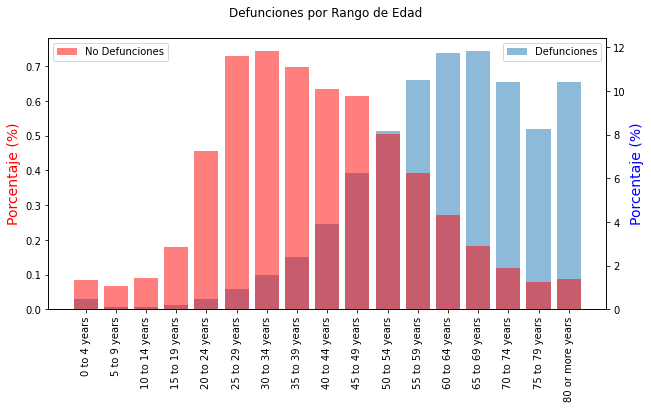

In [329]:
# create figure and axis objects with subplots()
fig,ax = plt.subplots(figsize = (10,5))
plt.title('Defunciones por Rango de Edad \n')
# make a plot
ax.bar(age_ranges['Age Range'], dead_age*100/total_cases, alpha = 0.5, label = 'Defunciones')
ax.legend(loc = 'upper right')
ax.set_ylabel("Porcentaje (%)",color="red",fontsize=14)

# twin object for two different y-axis on the sample plot
ax2=ax.twinx()
# make a plot with different y-axis using second axis object
ax2.bar(age_ranges['Age Range'], not_dead_age*100/total_cases,color = 'red', alpha = 0.5, label = 'No Defunciones')
ax2.legend(loc = 'upper left')
ax2.set_ylabel("Porcentaje (%)",color="blue",fontsize=14)

plt.setp(ax.xaxis.get_majorticklabels(), rotation='vertical')
plt.show()

In [342]:
df_covid_test_cases = df.groupby(['Is Dead','Covid Result'],as_index=False).sum()
df_covid_test_cases

,Is Dead,Covid Result,Cases
0,No,Non Positive SARS-CoV-2,19140635
1,No,Pending Result,5819412
2,No,Positive SARS-CoV-2,14603291
3,Yes,Non Positive SARS-CoV-2,423122
4,Yes,Pending Result,270738
5,Yes,Positive SARS-CoV-2,1619047


In [348]:
x_covid_result = df_covid_test_cases['Covid Result'].unique()
x_covid_result

array(['Non Positive SARS-CoV-2', 'Pending Result', 'Positive SARS-CoV-2'],
      dtype=object)

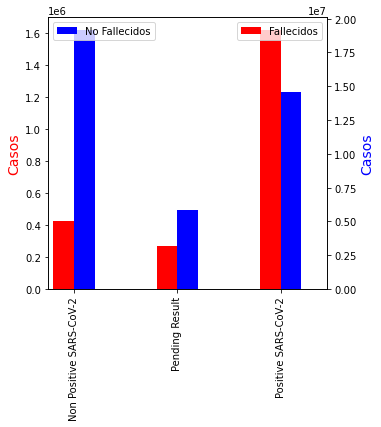

In [370]:
x_covid_result = df_covid_test_cases['Covid Result'].unique()
dead_covid_result = df_covid_test_cases.loc[df_covid_test_cases['Is Dead'] == 'Yes']['Cases']
not_dead_covid_result = df_covid_test_cases.loc[df_covid_test_cases['Is Dead'] == 'No']['Cases']


fig = plt.figure(figsize=(5,5)) # Create matplotlib figure

ax = fig.add_subplot(111) # Create matplotlib axes
ax2 = ax.twinx() # Create another axes that shares the same x-axis as ax.

width = 0.2

dead_covid_result.plot(kind='bar', color='red', ax=ax, width=width, position=1,label='Fallecidos')
not_dead_covid_result.plot(kind='bar', color='blue', ax=ax2, width=width, position=0,label='No Fallecidos')

# ax.bar(x_covid_result, dead_covid_result, alpha = 0.5, label = 'Defunciones',width=width, position=1)
# ax2.bar(x_covid_result, not_dead_covid_result, alpha = 0.5, label = 'Defunciones'width=width, position=0)

ax.set_ylabel('Fallecidos')
ax.set_xticklabels(x_covid_result)
ax.legend(loc = 'upper right')
ax.set_ylabel("Casos",color="red",fontsize=14)

ax2.set_ylabel('No Fallecidos')
ax2.legend(loc = 'upper left')
ax2.set_ylabel("Casos",color="blue",fontsize=14)

plt.setp(ax.xaxis.get_majorticklabels(), rotation='vertical')
# plt.setp(axs, xticks = x, xticklabels=x_labels)
plt.show()

In [371]:
df_COPD = df.groupby(['Is Dead','COPD Diagnose'],as_index=False).sum()
df_COPD

,Is Dead,COPD Diagnose,Cases
0,No,It is Ignored,112805
1,No,No,39054593
2,No,Yes,395940
3,Yes,It is Ignored,17339
4,Yes,No,2173742
5,Yes,Yes,121826


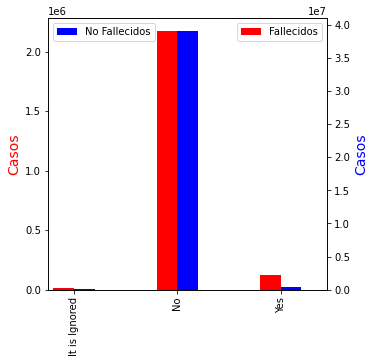

In [373]:
x_COPD = df_COPD['COPD Diagnose'].unique()
dead_COPD = df_COPD.loc[df_COPD['Is Dead'] == 'Yes']['Cases']
not_dead_COPD = df_COPD.loc[df_COPD['Is Dead'] == 'No']['Cases']


fig = plt.figure(figsize=(5,5)) # Create matplotlib figure

ax = fig.add_subplot(111) # Create matplotlib axes
ax2 = ax.twinx() # Create another axes that shares the same x-axis as ax.

width = 0.2

dead_COPD.plot(kind='bar', color='red', ax=ax, width=width, position=1,label='Fallecidos')
not_dead_COPD.plot(kind='bar', color='blue', ax=ax2, width=width, position=0,label='No Fallecidos')

# ax.bar(x_COPD, dead_COPD, alpha = 0.5, label = 'Defunciones',width=width, position=1)
# ax2.bar(x_COPD, not_dead_COPD, alpha = 0.5, label = 'Defunciones'width=width, position=0)

ax.set_ylabel('Fallecidos')
ax.set_xticklabels(x_COPD)
ax.legend(loc = 'upper right')
ax.set_ylabel("Casos",color="red",fontsize=14)

ax2.set_ylabel('No Fallecidos')
ax2.legend(loc = 'upper left')
ax2.set_ylabel("Casos",color="blue",fontsize=14)

plt.setp(ax.xaxis.get_majorticklabels(), rotation='vertical')
# plt.setp(axs, xticks = x, xticklabels=x_labels)
plt.show()

In [375]:
df_heart = df.groupby(['Is Dead','Cardiovascular Diagnose'],as_index=False).sum()
df_heart

,Is Dead,Cardiovascular Diagnose,Cases
0,No,It is Ignored,112500
1,No,No,38835947
2,No,Yes,614891
3,Yes,It is Ignored,17770
4,Yes,No,2160369
5,Yes,Yes,134768


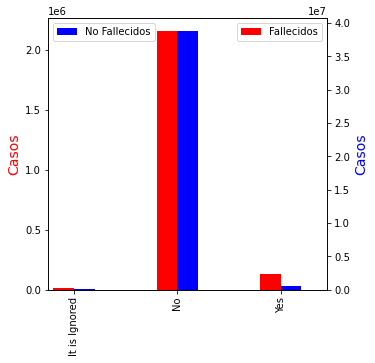

In [376]:
x_heart = df_heart['Cardiovascular Diagnose'].unique()
dead_heart = df_heart.loc[df_heart['Is Dead'] == 'Yes']['Cases']
not_dead_heart = df_heart.loc[df_heart['Is Dead'] == 'No']['Cases']


fig = plt.figure(figsize=(5,5)) # Create matplotlib figure

ax = fig.add_subplot(111) # Create matplotlib axes
ax2 = ax.twinx() # Create another axes that shares the same x-axis as ax.

width = 0.2

dead_heart.plot(kind='bar', color='red', ax=ax, width=width, position=1,label='Fallecidos')
not_dead_heart.plot(kind='bar', color='blue', ax=ax2, width=width, position=0,label='No Fallecidos')

# ax.bar(x_heart, dead_heart, alpha = 0.5, label = 'Defunciones',width=width, position=1)
# ax2.bar(x_heart, not_dead_heart, alpha = 0.5, label = 'Defunciones'width=width, position=0)

ax.set_ylabel('Fallecidos')
ax.set_xticklabels(x_heart)
ax.legend(loc = 'upper right')
ax.set_ylabel("Casos",color="red",fontsize=14)

ax2.set_ylabel('No Fallecidos')
ax2.legend(loc = 'upper left')
ax2.set_ylabel("Casos",color="blue",fontsize=14)

plt.setp(ax.xaxis.get_majorticklabels(), rotation='vertical')
# plt.setp(axs, xticks = x, xticklabels=x_labels)
plt.show()